- 마스크 착용 여부, 성별, 나이를 구분하는 모델을 각각 만든다
- 마스크 착용 여부 분류 문제를 0, 0.5, 1 로 접근한다. (라벨 스무딩적 접근법, 추후에 임계치 값을 어떻게 설정할지가 핵심일 듯 함)

강의에서 언급한 것 처럼 컴퍼티션 데이터를 가지고 스스로 EDA를 해보고 Notebook을 만들어 보세요!

아무런 베이스 코드 없이 주어진 데이터로 어떻게 분석 결과를 만들어 가야 할 지 당황스러울 수도 있을것 같습니다. 

하지만, 강의에서 언급한 대로 무엇이든지 좋습니다.  아래의 Further Reading을 참고해서 혹시 다른 사람들은 어떻게 이미지데이터를 분석하는지 살펴보고, 자신만의 이미지분류 EDA 노트북을 만들어 보는 것도 좋겠습니다.

EDA를 위한 가이드로 이미지 분류를 위해서 어떤 EDA를 할 수 있을 지에 대해서 가이드를 드리자면 아래와 같습니다.

데이터 분석의 방향을 설정하기 위해 데이터의 생김새 확인이 필요합니다. EDA 방법으로는 3가지 방법으로 나눌 수 있습니다.

- input이 될 X에 대한 분석
- target이 될 y에 대한 분석
- X, y 관계를 확인할 수 있는 분석
 

위 같은 케이스를 Image classification으로 가져온다면

- input이 될 X에 대한 분석
- X는 Image가 됩니다. X에 대한 특성(feature)은 어떤 것이 있을까요??
- 이미지 사이즈
- 분석 대상이 되는 객체의 위치
- RGB 채널별 통계 값
- target이 될 y에 대한 분석
- y는 저희가 맞추고자 하는 값이며 y값에 대한 특성은 어떤 것이 있을까요?? 
- y값에 독립적 분포 확인
- ex) y_1의 분포는?
- y값 들간의 관계 분포 확인
- ex) y_1, y_2 정보를 섞은 분포는?
- X, y 관계를 확인할 수 있는 분석
- X특성과 y의 특성 간의 분포 차이는 어떻게 있을까요??
- 이미지 사이즈와 y 특성의 관계
- RGB 통계값과 y 특성의 관계
- 객체의 위치와 y 특성의 관계
- 데이터의 노이즈 확인
- ex) y 값이 잘못 부여된것이 있을까??

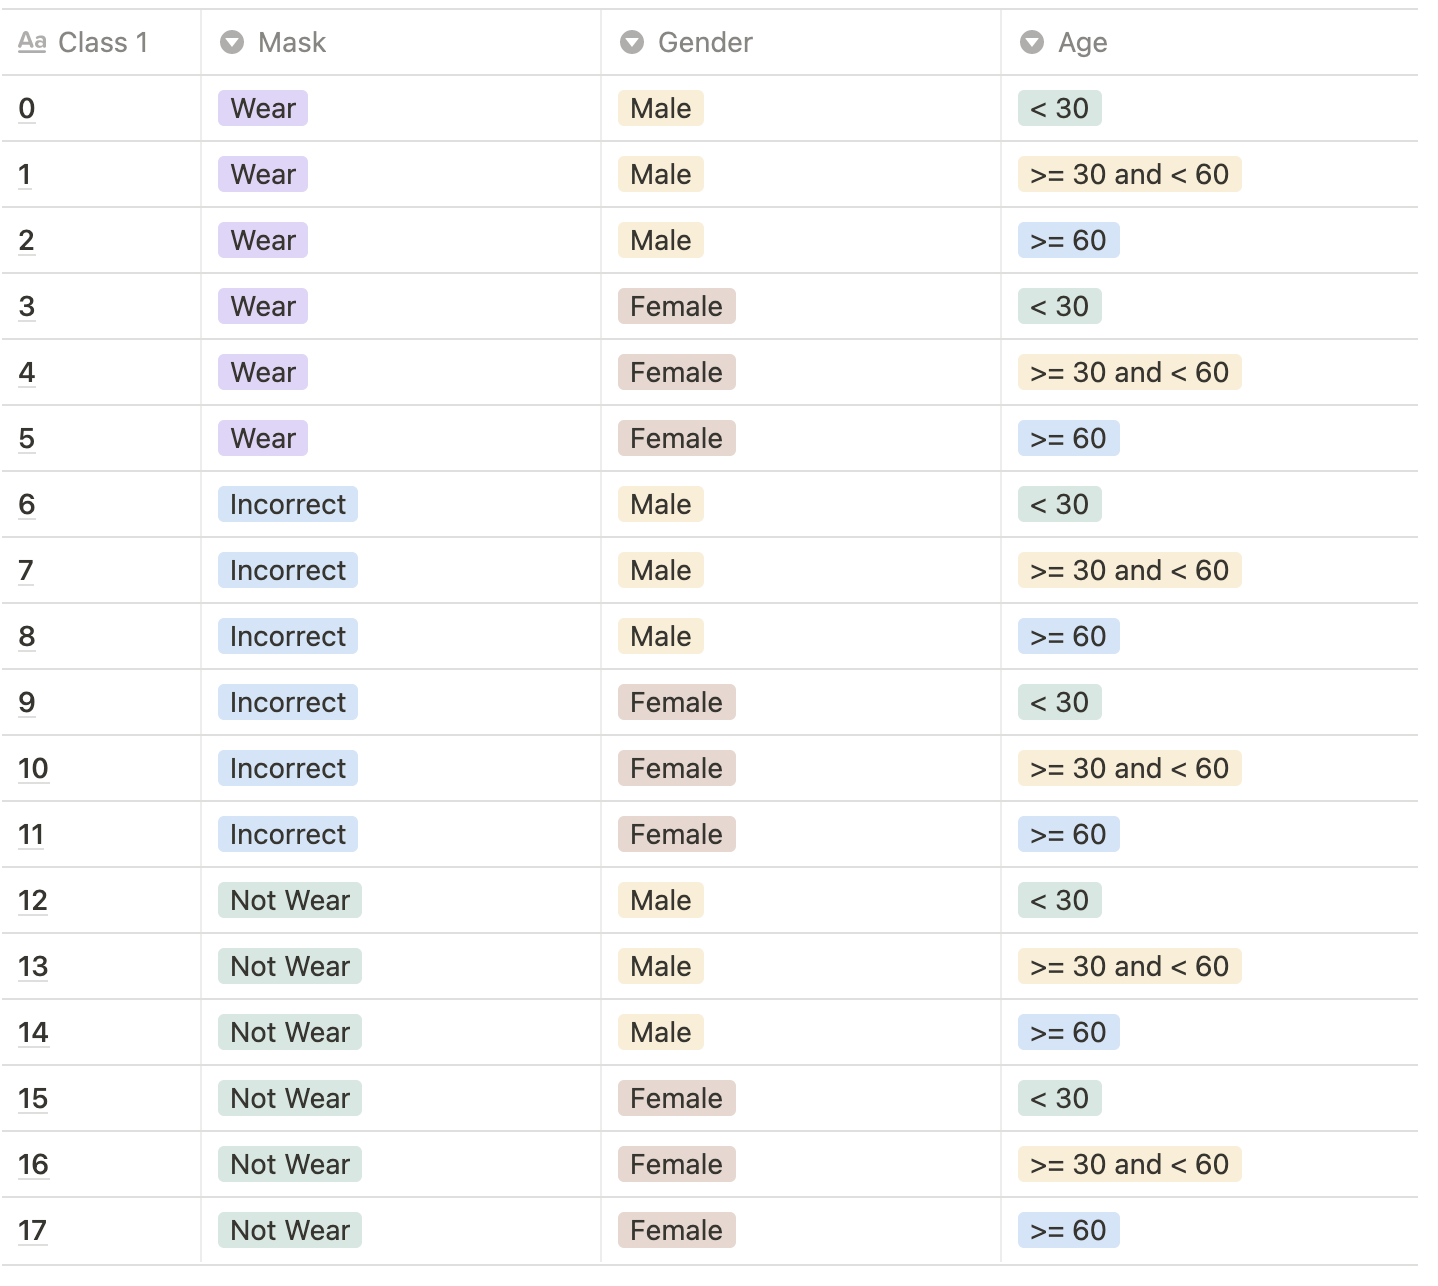

In [1]:
import pandas as pd
import numpy as np

import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

import os
from PIL import Image

data_dir = '../input/data/train/'
image_data_dir = data_dir + 'images/'

## 함수 정의

In [2]:
# 데이터 사이즈 크기 구하는 코드
def get_data_size(df):
    total_df = df.copy()
    
    female_df = df[df['gender'] == 'female']
    male_df = df[df['gender'] == 'male']
    
    age_cat0_df = df[df['age_cat'] == 0]
    age_cat1_df = df[df['age_cat'] == 1]
    age_cat2_df = df[df['age_cat'] == 2]
    
    print(f'전체 데이터 크기: {len(total_df) * 7}')
    print(f'female 데이터 크기: {len(female_df) * 7}, male 데이터 크기: {len(male_df) * 7}')
    print(f'age_cat0 데이터 크기: {len(age_cat0_df) * 7}, age_cat1 데이터 크기: {len(age_cat1_df) * 7}, age_cat2 데이터 크기: {len(age_cat2_df) * 7}')
    print()

    gender_li = ['female', 'male']
    age_cat_li = [0, 1, 2]
    age_cat_describe = ['x < 30', '30 <= x < 60', '60 <= x']
    
    for gender in gender_li:
        for age_cat in age_cat_li:
            target_df = df[(df['gender'] == gender) & (df['age_cat'] == age_cat)]
            print(f'{gender} and {age_cat_describe[age_cat]} 전체 데이터 크기: {len(target_df) * 7}')
            print(f'{gender} and {age_cat_describe[age_cat]} 마스크 착용 데이터 크기: {len(target_df) * 5}')
            print(f'{gender} and {age_cat_describe[age_cat]} 마스크 미착용 데이터 크기: {len(target_df) * 1}')
            print(f'{gender} and {age_cat_describe[age_cat]} 마스크 잘 못 착용 데이터 크기: {len(target_df) * 1}')
            print()

In [3]:
# 클래스별 이미지 시각화
def show_img(df, show_cnt = 2, seed = 22):
    gender_li = ['female', 'male']
    age_cat_li = [0, 1, 2]
    age_cat_describe = ['x < 30', '30 <= x < 60', '60 <= x']
    
    fig, ax = plt.subplots(6 * show_cnt, 7, figsize = (30, 30))
    ax = ax.flatten()
    idx = 0
    
    for gender in gender_li:
        for age_cat in age_cat_li:
            target_df = df[(df['gender'] == gender) & (df['age_cat'] == age_cat)]
            img_path_li = target_df['path'].tolist()
            np.random.seed(seed)
            img_path_li = sorted(np.random.choice(img_path_li, size = show_cnt, replace = False).tolist())
            
            for img_path in img_path_li:
                img_li = os.listdir(image_data_dir + img_path + '/')
                for img in img_li:
                    img_name = img.split('.')[0]
                    if img_name.startswith('mask') or img_name.startswith('normal') or img_name.startswith('incorrect_mask'):
                        img_dir = image_data_dir + img_path + '/' + img
                        img = Image.open(img_dir)
                        img = np.array(img)
                        ax[idx].imshow(img)
                        ax[idx].set_title(f'{gender} and {age_cat_describe[age_cat]} {img_name}')
                        ax[idx].set_xticks([])
                        ax[idx].set_yticks([])
                        idx += 1
    plt.show()

In [4]:
# 나이 범주화
def get_age_cat(x):
    '''
    # 0 - x < 30
    # 1 - 30 <= x < 60
    # 2 - 60 <= x
    '''
    if x < 30: return 0
    elif x < 60: return 1
    else: return 2

## 데이터 확인

In [5]:
train_df = pd.read_csv(data_dir + 'train.csv')

In [6]:
train_df['age_cat'] = train_df['age'].apply(lambda x : get_age_cat(x))

In [7]:
train_df.sample(10)

,id,gender,race,age,path,age_cat
2366,006242,male,Asian,19,006242_male_Asian_19,0
1171,003127,female,Asian,20,003127_female_Asian_20,0
215,000611,male,Asian,51,000611_male_Asian_51,1
854,001599,male,Asian,24,001599_male_Asian_24,0
971,001763,female,Asian,42,001763_female_Asian_42,1
1239,003224,female,Asian,19,003224_female_Asian_19,0
167,000547,female,Asian,55,000547_female_Asian_55,1
916,001700,male,Asian,33,001700_male_Asian_33,1
868,001617,female,Asian,37,001617_female_Asian_37,1
823,001564,male,Asian,22,001564_male_Asian_22,0


## EDA

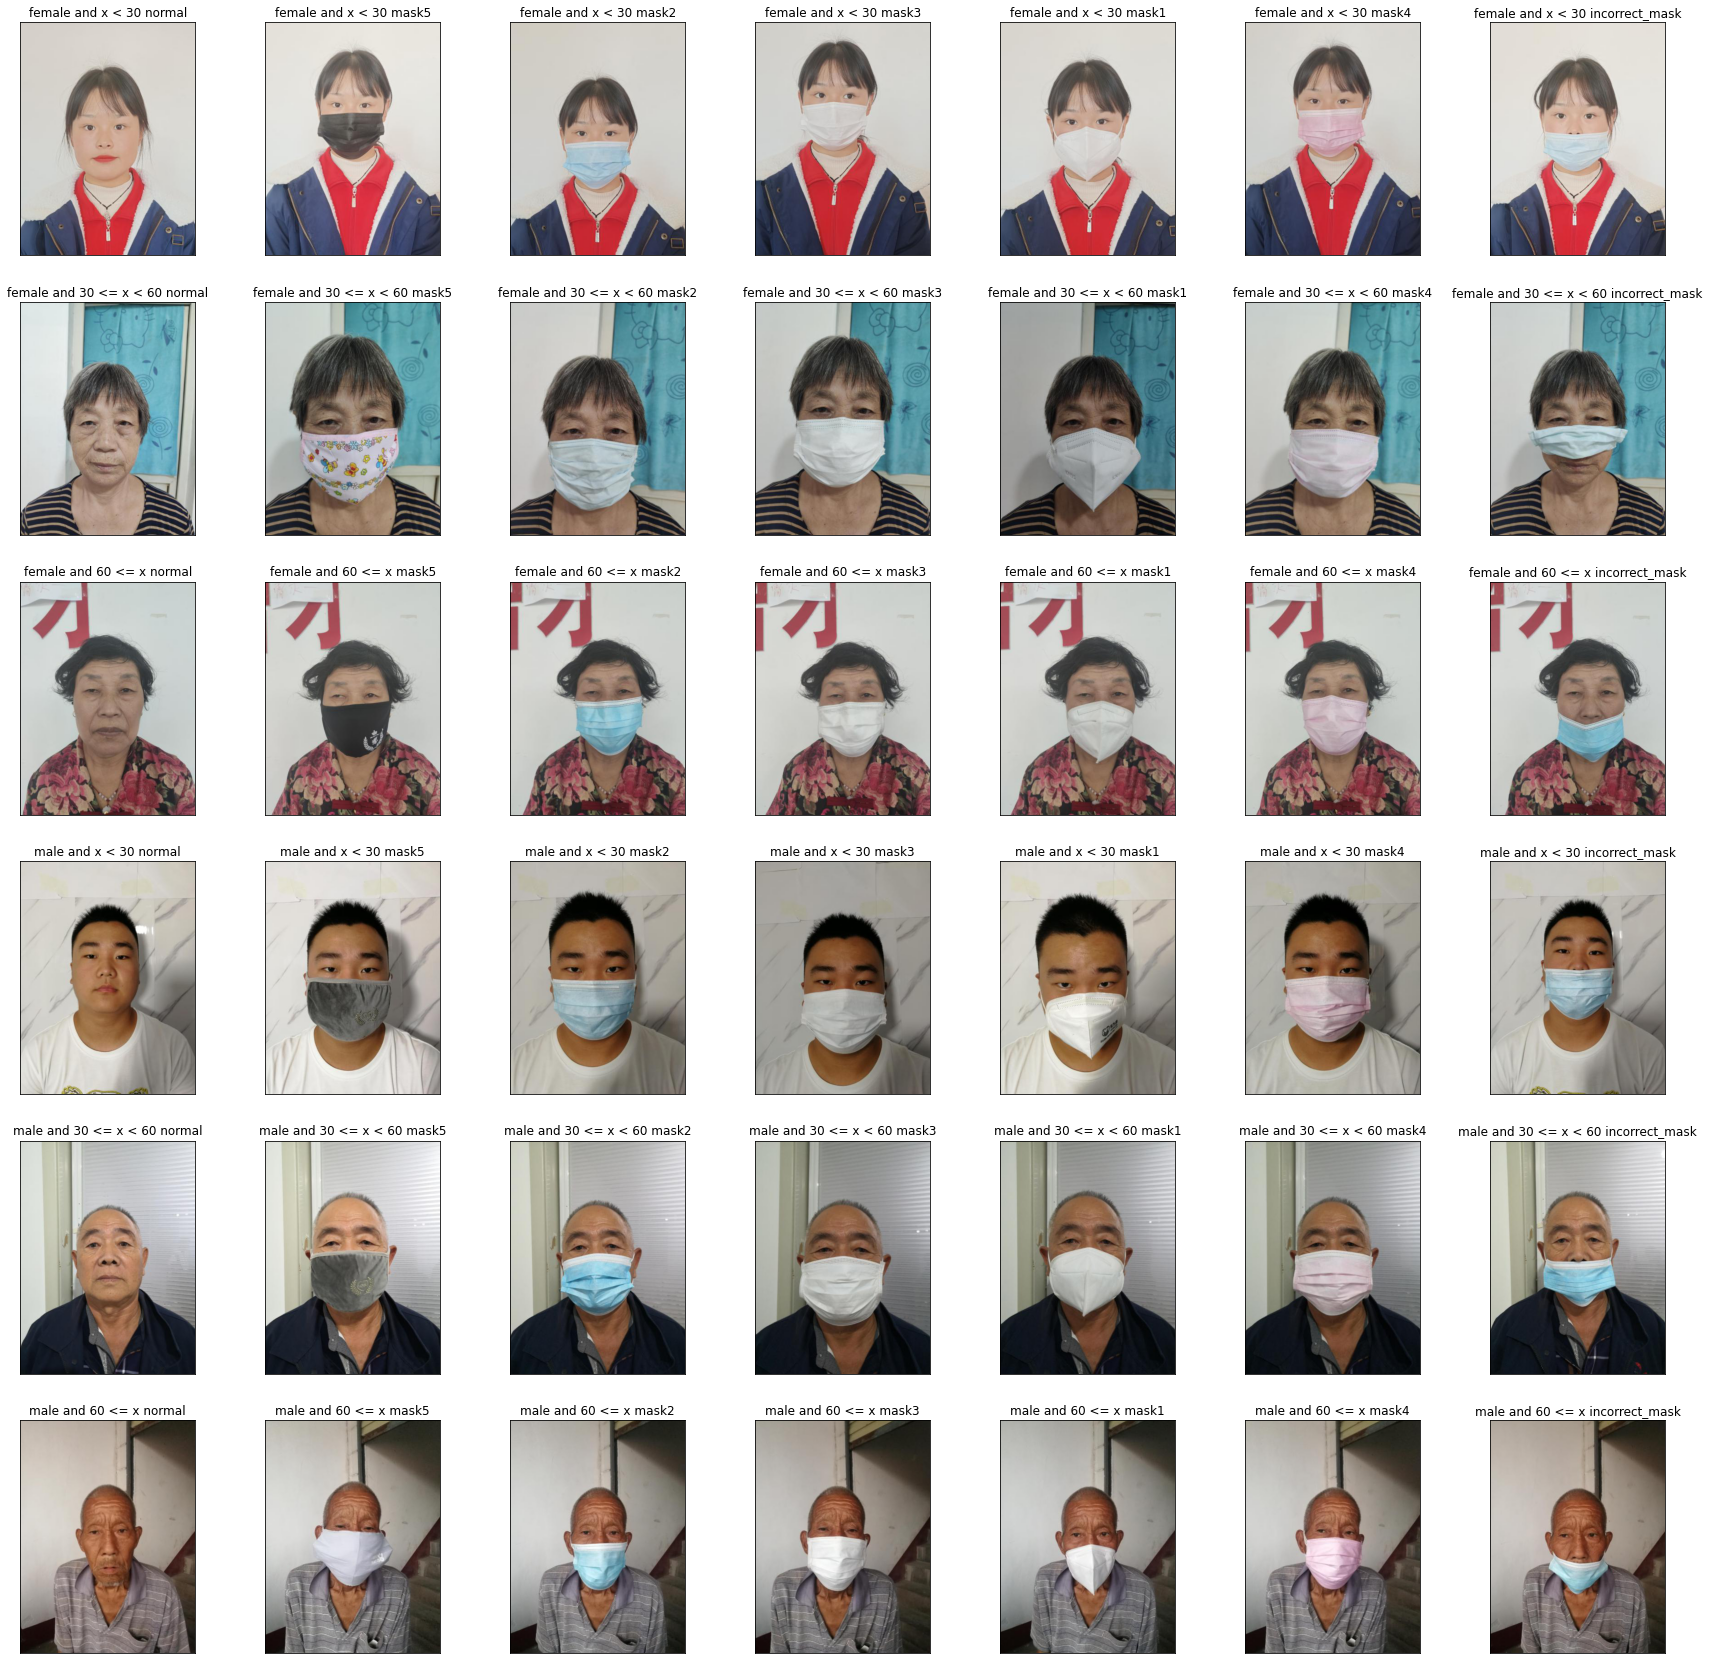

In [8]:
show_img(df = train_df, show_cnt = 1, seed = 22)

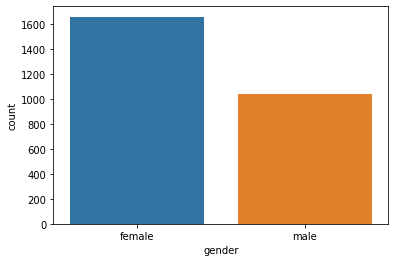

In [9]:
sns.countplot(data = train_df, x = 'gender')

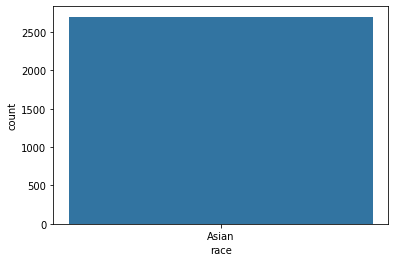

In [10]:
sns.countplot(data = train_df, x = 'race')

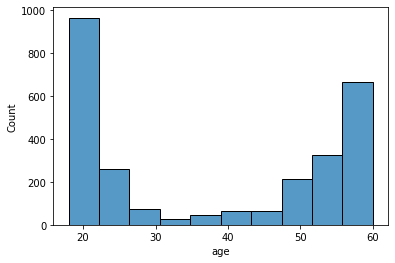

In [11]:
# 나이 구별 시에는 엄청난 불균형 데이터가 포함될 듯함
sns.histplot(data = train_df, x = 'age', bins = 10)

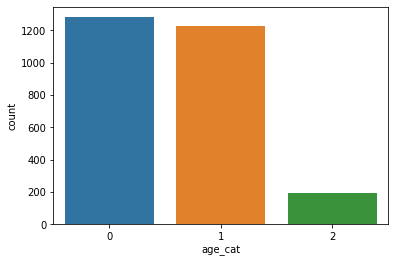

In [12]:
sns.countplot(data = train_df, x = 'age_cat')

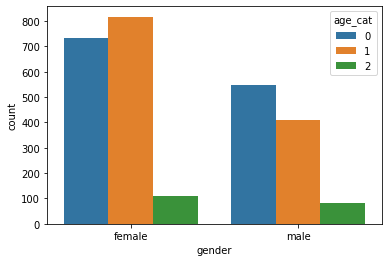

In [13]:
# 데이터의 분포가 생각보다 불균형 적임, 60세 이상에 사람을 어떻게 할 지 생각해볼 필요가 있을 듯함
sns.countplot(data = train_df, x = 'gender', hue = 'age_cat')

In [14]:
get_data_size(df = train_df)

전체 데이터 크기: 18900
female 데이터 크기: 11606, male 데이터 크기: 7294
age_cat0 데이터 크기: 8967, age_cat1 데이터 크기: 8589, age_cat2 데이터 크기: 1344

female and x < 30 전체 데이터 크기: 5124
female and x < 30 마스크 착용 데이터 크기: 3660
female and x < 30 마스크 미착용 데이터 크기: 732
female and x < 30 마스크 잘 못 착용 데이터 크기: 732

female and 30 <= x < 60 전체 데이터 크기: 5719
female and 30 <= x < 60 마스크 착용 데이터 크기: 4085
female and 30 <= x < 60 마스크 미착용 데이터 크기: 817
female and 30 <= x < 60 마스크 잘 못 착용 데이터 크기: 817

female and 60 <= x 전체 데이터 크기: 763
female and 60 <= x 마스크 착용 데이터 크기: 545
female and 60 <= x 마스크 미착용 데이터 크기: 109
female and 60 <= x 마스크 잘 못 착용 데이터 크기: 109

male and x < 30 전체 데이터 크기: 3843
male and x < 30 마스크 착용 데이터 크기: 2745
male and x < 30 마스크 미착용 데이터 크기: 549
male and x < 30 마스크 잘 못 착용 데이터 크기: 549

male and 30 <= x < 60 전체 데이터 크기: 2870
male and 30 <= x < 60 마스크 착용 데이터 크기: 2050
male and 30 <= x < 60 마스크 미착용 데이터 크기: 410
male and 30 <= x < 60 마스크 잘 못 착용 데이터 크기: 410

male and 60 <= x 전체 데이터 크기: 581
male and 60 <= x 마스크 착용 데이터 크기: 415
male and 60 